## A simple visual data maker

This is a simple multiclass 2-dimensional data maker.  Create an instance of the datamaker class below, and an empty plot will appear.  Put points of one class wherever you like by clicking on the plotting area.  Once you are finished placing points from one class, click just outside of the square plotting area in the Figure to change classes, then place points from the next class.  And so on.  Once you have finished placing points call the 'save_data' function to save your data with labels.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
%matplotlib nbagg

In [2]:
class datamaker:
    def __init__(self):
        # initialize variables + containers for plotting
        self.label_num = 0
        self.colors = ['r','g','b','c','m','k']
        
        self.pts = []
        self.labels = []

        # initialize interactive plot
        fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
        self.ax1 = fig.add_subplot(111)
        self.ax_to_plot = self.ax1
        self.clean_plot()
        self.cid = fig.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        if not event.inaxes:
            self.label_num+=1
            return
        
        # plot click
        x = event.xdata
        y = event.ydata
        self.interactive_pt = self.ax1.scatter(x,y,color = self.colors[self.label_num],zorder = 2)
        self.clean_plot()
        
        # save datapoint
        pt = np.asarray([x,y])
        self.pts.append(pt)
        self.labels.append(self.label_num)
        
    # clean up plot
    def clean_plot(self):
        self.ax1.set_xticks([])
        self.ax1.set_yticks([])
        self.ax1.set_xlim([-2,2])
        self.ax1.set_ylim([-2,2])
        
    # save data
    def save_data(self,csvname):
        p = np.asarray(self.pts)
        l = np.asarray(self.labels)
        l.shape = (len(l),1)
        f = np.concatenate((p,l),axis=1)
        f = pd.DataFrame(f)
        f.to_csv(csvname,header = None, index = False)

<IPython.core.display.Javascript object>


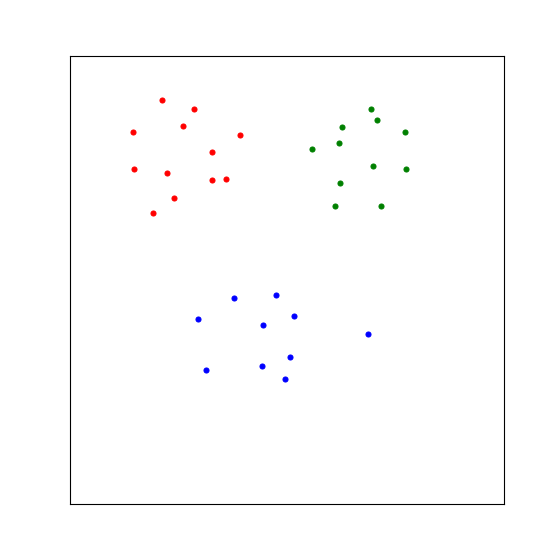

In [3]:
# run an instance of the datamaker - to save data activate NEXT cell
demo = datamaker()

In [4]:
# activate this cell to save the data you made abobve
demo.save_data(csvname = 'test_data.csv')